# AI & CHATBOT - Global Solution

## Integrantes:

#### Breno Lemes Santiago - RM: 552270 - TDSPK
#### Daniel dos Santos Araujo Faria - RM: 99067 - TDSPK
#### Francineldo Luan Martins Alvelino - RM: 99558 - TDSPI
#### Mariana Trentino Albano - RM: 551154 - TDSPM
#### Vitória Maria de Camargo - RM: 552344 - TDSPK

## Importação de Bibliotecas


In [5]:
# Matplotlib é a biblioteca responsável pela geração de gráficos,
# essa biblioteca consegue gerar figuras e formatos
# capaz de gerar uma diversidade de formatos e figuras,
# além de diferentes tipos de gráficos.
import matplotlib.pyplot as plt

# Pandas é uma biblioteca para Python responsável pelo fornecimento de
# estruturas de dados rápidas, além de ferramentas para análise de dados.
import pandas as pd

# NumPy é uma biblioteca responsável pela execução de diversas
# tarefas matemáticas, além de outras funções incorporadas,
# como a geração de números aleatórios.
import numpy as np

# Seaborn é uma biblioteca baseada em Matplotlib.
# Sua utilização pode ser feita para a criação de graficos
# mais elegantes e informativos utilizando poucas linhas de código.
import seaborn as sns

# O Joblib é uma biblioteca para Python que desempenha um papel crucial na
# facilitação da execução eficiente de tarefas intensivas em computação,
# especialmente aquelas relacionadas ao processamento paralelo e à serialização de objetos.
import joblib

# Pacotes para avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Pacotes para utilização dos algoritmos KNN e Support Vector Classifier (SVC)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Pacote para conversão de colunas numéricas em colunas categóricas
from sklearn.preprocessing import LabelEncoder
# Pacote para separação dos dados para treino e teste
from sklearn.model_selection import train_test_split

# Pacotes para utilização dos algoritmos KMeans e silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets

# Pacote para suprimir avisos
import warnings
warnings.filterwarnings('ignore')

# Pacote para utilização do algoritmo HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


## O Dataset
<hr>

### Fonte: https://www.kaggle.com/datasets/drateendrajha/global-child-mortality-rate/data

# Global Child Mortality Rate

### <b>Descrição:</b>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><p> Meta 3.2: Até 2030, acabar com as mortes evitáveis de recém-nascidos e crianças menores de 5 anos, com todos os países objetivando reduzir a mortalidade neonatal para pelo menos até 12 por 1.000 nascidos vivos e a mortalidade de crianças menores de 5 anos para pelo menos até 25 por 1.000 nascidos vivos</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Tamanho do conjunto de dados:</b><p>
Este conjunto de dados contém dados de 197 países de 1967 a 2020.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Reconhecimentos:</b><p>
Grato ao UNICEF pelos dados.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Extraído por:</b><p>
drateendrajha.com
em caso de qualquer dúvida, sinta-se à vontade para entrar em contato com ajha@phaf.in</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Country</b> (Nome do país)</li>
    <li><b>Year</b> (Ano em forma numérica)</li>
    <li><b>Gender</b> (Masculino; Feminino)</li>
    <li><b>Child Mortality</b> (Mortalidade Infantil)</li>
    <li><b>Total Population</b> (População do respectivo país no respectivo ano)</li>
    <li><b>Mortality Rate</b> (Mortalidade Infantil / População Total)</li>
</ul>

# Leitura dos dados

## Criando um dataframe a partir do arquivo .csv externo.

In [6]:
df = pd.read_csv('/content/ChildMOrtalytRate.csv')

## O método drop() serve para eliminar linhas e colunas de tabelas, nesse caso as colunas que não seriam úteis para os testes foram eliminadas

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

### A função head() nos possibilita a visualização das primeiras linhas de dados do dataset selecionado


In [8]:
df.head()

,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,Afghanistan,1971,Female,26671.0,5630.099,4.737217


### A função tail() nos possibilita a visualização das últimas linhas de dados do dataset selecionado


In [9]:
df.tail()

,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
30935,Zimbabwe,2015,Total,9031.0,13814.642,0.653727
30936,Zimbabwe,2016,Total,8566.0,14030.338,0.610534
30937,Zimbabwe,2017,Total,8318.0,14236.599,0.584269
30938,Zimbabwe,2018,Total,7692.0,14438.812,0.532731
30939,Zimbabwe,2019,Total,7397.0,14645.473,0.505071


### A função info() nos possibilita ter uma visão geral dos rótulos das colunas, tipos dos dados, entre outras características do DataFrame do dataset selecionado

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  30940 non-null  object 
 1   Year                     30940 non-null  int64  
 2   Gender                   30940 non-null  object 
 3   Child Mortality(1 to 4)  30940 non-null  float64
 4   Total Population         30064 non-null  float64
 5   Mortality Rate           30064 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ MB


### A função shape nos possibilita a visualização do tamanho do dataset selecionado


In [11]:
df.shape


(30940, 6)

## A função describe() possibilita a visualização das estatísticas descritivas e a função round() possibilita o arredondamento de um número

In [12]:
df.describe().round(2)


,Year,Child Mortality(1 to 4),Total Population,Mortality Rate
count,30940.00,30940.00,30064.00,30064.00
mean,1991.46,12727.22,19751.13,0.96
std,17.32,63702.84,80537.80,1.48
min,1955.00,0.00,1.61,0.00
25%,1978.00,69.00,992.82,0.04
50%,1993.00,649.00,3890.68,0.23
75%,2006.00,6499.50,11751.35,1.29
max,2019.00,1463821.00,1433783.69,10.88


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

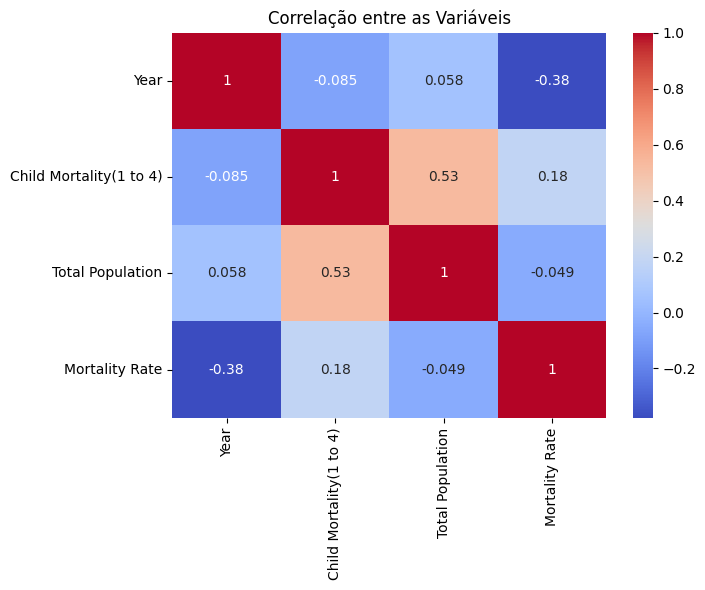

In [13]:
# Criando um heatmap
# Um heatmap (mapa de calor) é uma técnica de visualização de dados
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Adicionando título
plt.title('Correlação entre as Variáveis')

# Exibindo o heatmap
plt.show()

# Análises gráficas

## Realizando Plotamento da variável *dependente* (y)

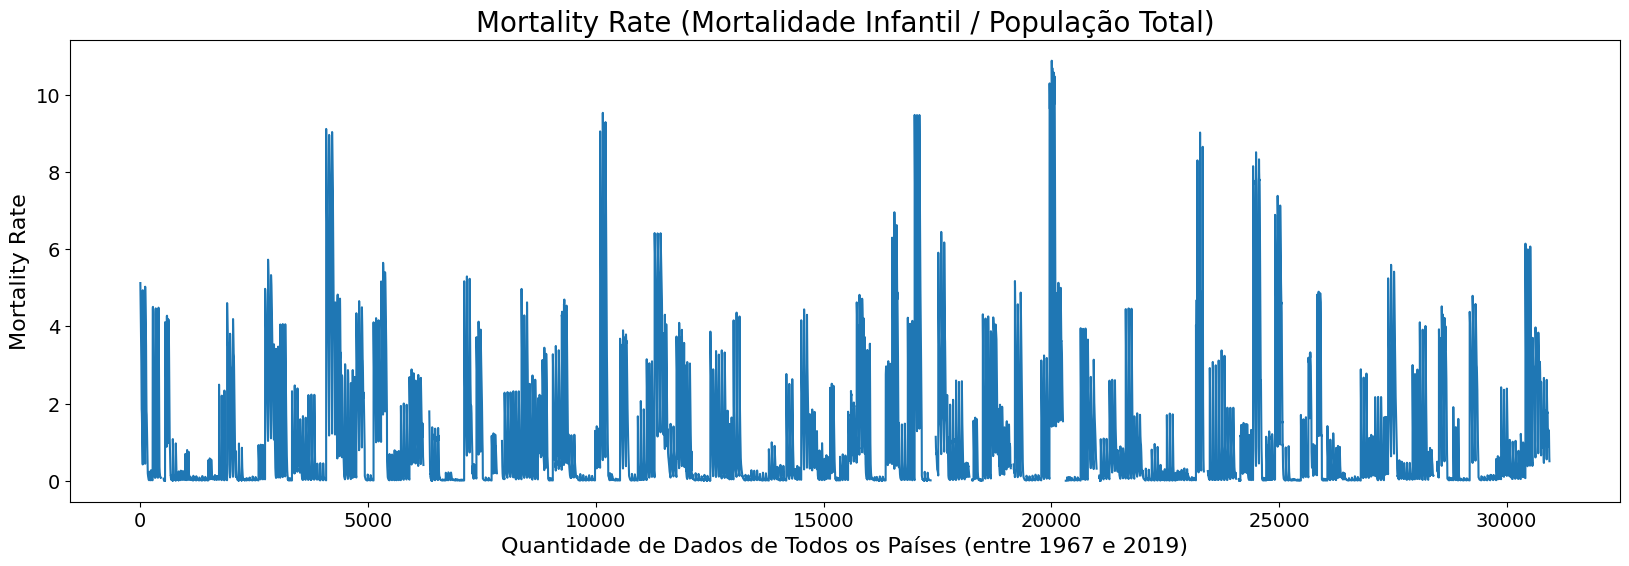

In [14]:
# Cria as variáveis fig e ax:
fig, ax = plt.subplots(figsize=(20,6))

# Título do gráfico
ax.set_title('Mortality Rate (Mortalidade Infantil / População Total)', fontsize=20)
# Label do eixo x:
ax.set_ylabel('Mortality Rate', fontsize=16)
# Label do eixo y:
ax.set_xlabel('Quantidade de Dados de Todos os Países (entre 1967 e 2019)', fontsize=16)
# Plotagem dos dados da coluna "consumo".
ax = df['Mortality Rate'].plot(fontsize=14)

## Distribuição de frequências da variável dependente (y)

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Child Mortality(1 to 4)', ylabel='Child Mortality(1 to 4)'>

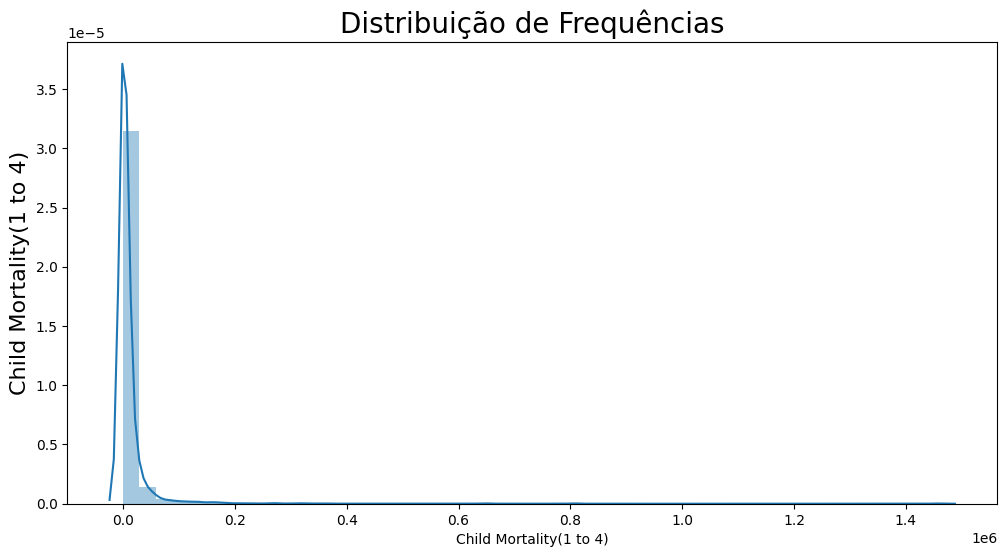

In [15]:
# Cria um gráfico de distribuição
ax = sns.distplot(df['Child Mortality(1 to 4)'])
# Define o tamanho da figura
ax.figure.set_size_inches(12, 6)
# Título do gráfico
ax.set_title('Distribuição de Frequências', fontsize=20)
# Label do eixo y:
ax.set_ylabel('Child Mortality(1 to 4)', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

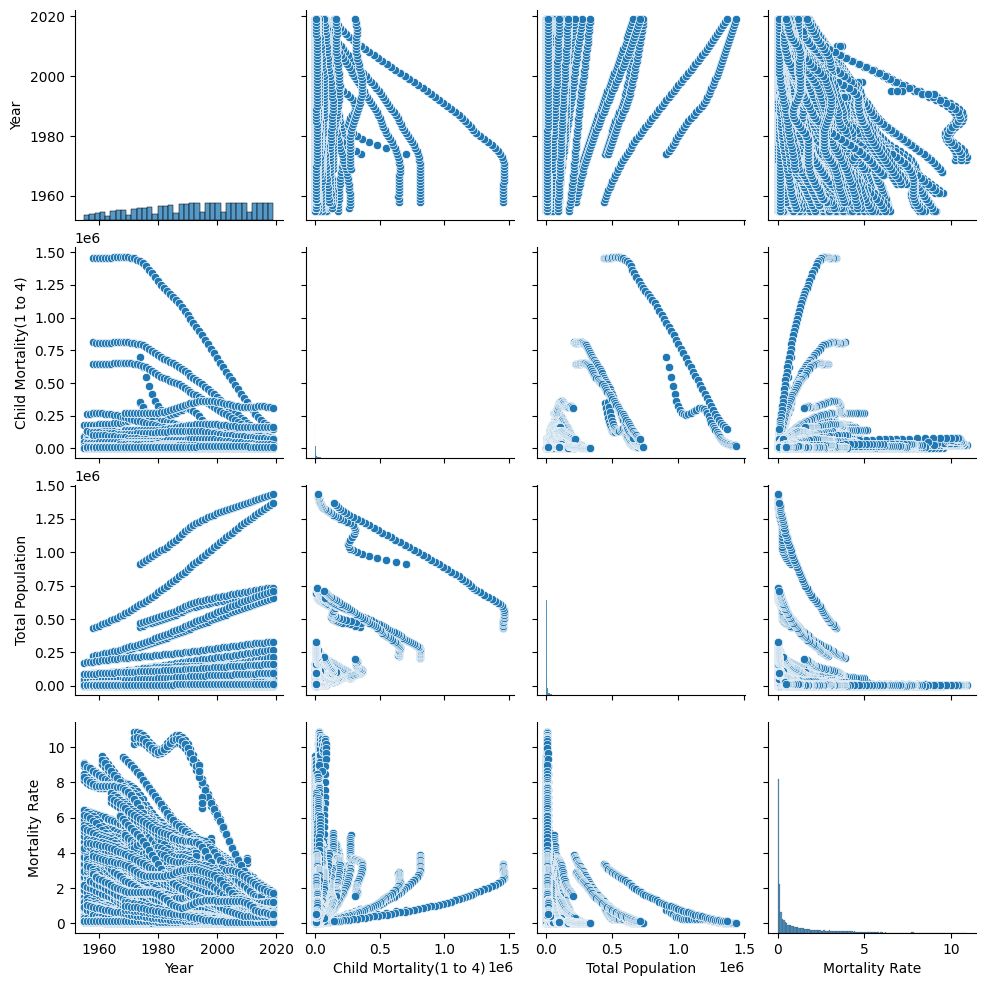

In [16]:
ax = sns.pairplot(df)

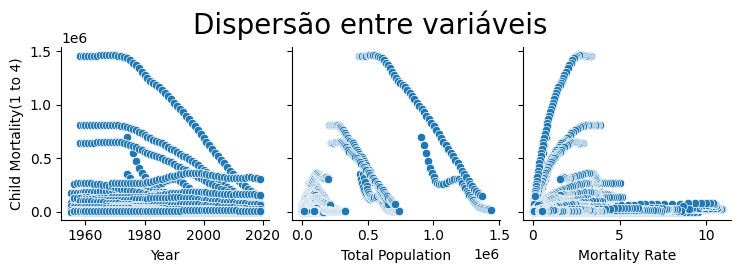

In [17]:
# Eixo y: Variável Dependente. Child Mortality(1 to 4), Eixo X: variáveis independentes. Year, Total Population e	Mortality Rate
ax = sns.pairplot(df, y_vars='Child Mortality(1 to 4)', x_vars=['Year', 'Total Population', 'Mortality Rate'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.05)
ax

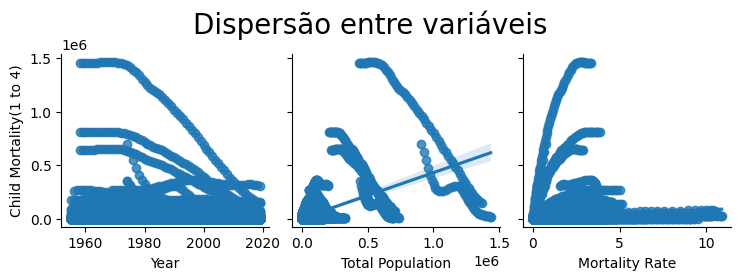

In [18]:
# Estimando a reta de regressão com "reg".
ax = sns.pairplot(df, y_vars='Child Mortality(1 to 4)', x_vars=['Year', 'Total Population', 'Mortality Rate'], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.08)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

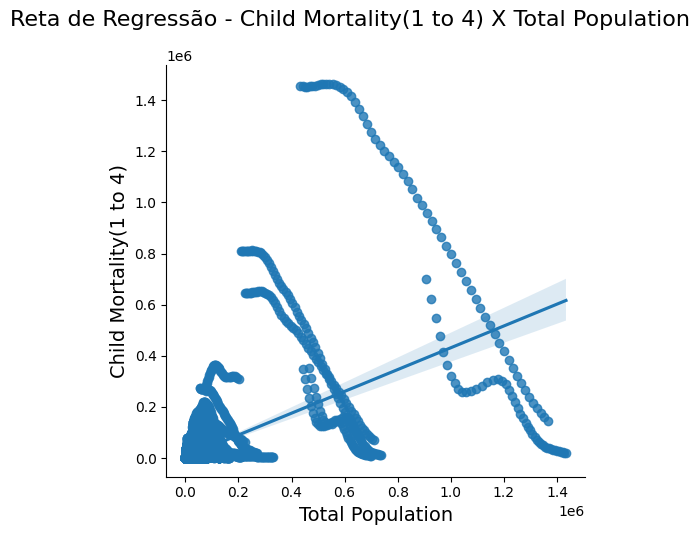

In [19]:
# Cria um gráfico de dispersão com uma linha de regressão linear
ax = sns.lmplot(x="Total Population", y="Child Mortality(1 to 4)", data=df)
# Adiciona um título à figura
ax.fig.suptitle('Reta de Regressão - Child Mortality(1 to 4) X Total Population', fontsize=16, y=1.05)
# Define um rótulo para o eixo x
ax.set_xlabels("Total Population", fontsize=14)
# Define um rótulo para o eixo y
ax.set_ylabels("Child Mortality(1 to 4)", fontsize=14)
ax

## Histograma e Gráfico de Barras

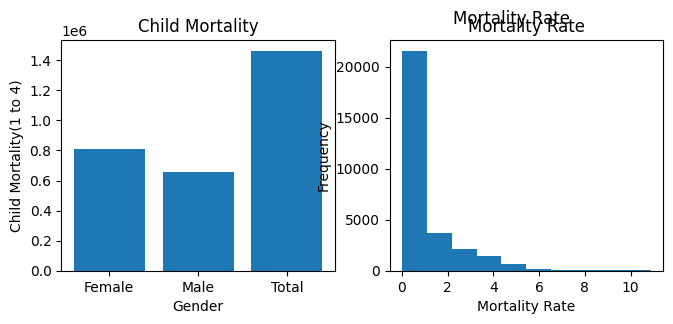

In [20]:
# Define duas variáveis
x1 = df['Gender']
y1 = df['Child Mortality(1 to 4)']

# Define uma variável
x2 = df['Mortality Rate']

# Figura para adicionar os gráficos
figura = plt.figure(figsize=(12, 3))
# Adiciona um título principal
figura.suptitle('Mortality Rate')

# 131: A figura terá 1 linha, 3 colunas e um gráfico na posição 1
ax1 = figura.add_subplot(131)
# Cria um gráfico de barras usando os dados de x1 no eixo x e y1 no eixo y.
ax1.bar(x1, y1)
# Adiciona título e rótulos aos eixos
ax1.set_title('Child Mortality')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Child Mortality(1 to 4)')

# 134: A figura terá 1 linha, 3 colunas e um gráfico na posição 2
ax2 = figura.add_subplot(132)
# Cria um histograma usando os dados de x2
ax2.hist(x2)
# Adiciona título e rótulos aos eixos
ax2.set_title('Mortality Rate')
ax2.set_xlabel('Mortality Rate')
ax2.set_ylabel('Frequency')

# Salva a figura como um arquivo de imagem
plt.savefig('graficos.png')
# Exibe a figura na tela
plt.show(figura)



# Conclusão
### Ao concluir esta etapa de análise e visualização de dados, torna-se evidente que a representação gráfica é uma ferramenta essencial na compreensão de padrões e relações em conjuntos de dados complexos.

### O gráfico de barras, ao comparar o gênero com a taxa de mortalidade infantil (idade de 1 a 4 anos), ofereceu informações visuais significativas sobre as diferenças existentes. A inclusão de títulos e rótulos nos eixos tornou clara a compreensão das informações apresentadas, destacando a relevância das relações de gênero nesse contexto.

### O histograma da taxa de mortalidade, nos mostra uma representação visual da distribuição dessa variável. A presença de títulos e rótulos nos eixos contribuiu para uma interpretação mais intuitiva da frequência das diferentes taxas de mortalidade, aprimorando a compreensão global dos dados.

# CLASSIFICAÇÃO

# Separando os dados em features (X) and labels (y)
**As features representam os valores (atributos) de um linha e os labels as classificações únicas das linhas**

In [21]:
# Remove todas as linhas de df que contêm valores nulos
df = df.dropna()
# Seleção de features (entradas)
X = df.iloc[:, [1, 3, 4, 5]].values #Valores (features)
X

array([[1.96700000e+03, 2.60120000e+04, 5.08081300e+03, 5.11965309e+00],
       [1.96800000e+03, 2.61920000e+04, 5.20260600e+03, 5.03440007e+00],
       [1.96900000e+03, 2.63350000e+04, 5.33393600e+03, 4.93725459e+00],
       ...,
       [2.01700000e+03, 8.31800000e+03, 1.42365990e+04, 5.84268757e-01],
       [2.01800000e+03, 7.69200000e+03, 1.44388120e+04, 5.32730809e-01],
       [2.01900000e+03, 7.39700000e+03, 1.46454730e+04, 5.05070748e-01]])

In [22]:
# Seleção da coluna target
y = df['Country'] #Espécies (labels)
y

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
30935       Zimbabwe
30936       Zimbabwe
30937       Zimbabwe
30938       Zimbabwe
30939       Zimbabwe
Name: Country, Length: 30064, dtype: object

# Separando dados para treinamento e testes

In [23]:
# Divide os conjuntos de dados X e y em conjuntos de treinamento e testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [24]:
# Verificar o número de linhas e colunas do conjunto de treinamento
X_train.shape

(24051, 4)

In [25]:
# # Verificar o número de linhas e colunas do conjunto de teste
X_test.shape

(6013, 4)

In [26]:
df

,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,Afghanistan,1971,Female,26671.0,5630.099,4.737217
...,...,...,...,...,...,...
30935,Zimbabwe,2015,Total,9031.0,13814.642,0.653727
30936,Zimbabwe,2016,Total,8566.0,14030.338,0.610534
30937,Zimbabwe,2017,Total,8318.0,14236.599,0.584269
30938,Zimbabwe,2018,Total,7692.0,14438.812,0.532731


# Treinando os modelos (método fit)

In [27]:
# Cria uma instância do modelo
SVC_model = SVC()
# Treina o modelo com os conjuntos de treinamento
SVC_model.fit(X_train, y_train)

SVC()

In [28]:
# Cria uma instância do modelo KNN
KNN_model = KNeighborsClassifier(n_neighbors=5)
# Treina o modelo KNN com os conjuntos de treinamento
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

# Testando os modelos (método predict)

In [29]:
# Método Predict
# Faz previsões no conjunto de teste
SVC_prediction = SVC_model.predict(X_test)

In [30]:
# Exibe as previsões feitas pelo modelo
SVC_prediction

array(['Nigeria', 'Thailand', 'Bulgaria', ..., 'Eswatini', 'Benin',
       'Democratic Republic of the Congo'], dtype=object)

In [31]:
# Faz previsões no conjunto de teste
KNN_prediction = KNN_model.predict(X_test)

In [32]:
# Exibe as previsões feitas pelo modelo
KNN_prediction

array(['Nigeria', 'Philippines', 'Chile', ..., 'North Macedonia',
       'Cameroon', 'Pakistan'], dtype=object)

# Mostrando resultados

## Algoritmo SVC

### Acurácia (accuracy)

In [33]:
# Compara as previsões feitas pelo modelo SVC com os rótulos reais dos dados de teste e retorna a acurácia do modelo.
acuracia_svc = (accuracy_score(SVC_prediction, y_test)*100)

In [34]:
#  Imprime a acurácia do modelo
print(f'Acurácia do modelo SVC: {acuracia_svc: .2f} %')

Acurácia do modelo SVC:  5.79 %


### Confusion Matrix

In [35]:
# Calcula a matriz de confusão entre as previsões feitas pelo modelo
print(confusion_matrix(SVC_prediction, y_test))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]]


### Relatório de classificação

In [36]:
# Gera um relatório de classificação
print(classification_report(SVC_prediction, y_test))

                                       precision    recall  f1-score   support

                          Afghanistan       0.00      0.00      0.00         0
                              Albania       0.00      0.00      0.00         0
                              Algeria       0.00      0.00      0.00         0
                              Andorra       0.00      0.00      0.00         0
                               Angola       0.00      0.00      0.00         0
                  Antigua and Barbuda       0.00      0.00      0.00         0
                            Argentina       0.00      0.00      0.00         0
                              Armenia       0.00      0.00      0.00         0
                            Australia       0.00      0.00      0.00         0
                              Austria       0.00      0.00      0.00         0
                           Azerbaijan       0.00      0.00      0.00         0
                              Bahamas       0.00   

## Algoritmo KNN

### Acurácia (accuracy)
*número de previsões corretas dividido pela quantidade de testes*

In [37]:
# Compara as previsões feitas pelo modelo KNN com os rótulos reais dos dados de teste e retorna a acurácia do modelo.
acuracia_knn = (accuracy_score(KNN_prediction, y_test)*100)

In [38]:
#  Imprime a acurácia do modelo
print(f'Acurácia do modelo KNN: {acuracia_knn: .2f} %')

Acurácia do modelo KNN:  49.46 %


### Confusion matrix
*A quantidade de previsões corretas por ser encontrada na diagonal principal da matriz*

In [39]:
# Calcula a matriz de confusão entre as previsões feitas pelo modelo
print(confusion_matrix(KNN_prediction, y_test))


[[15  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 16 ...  2  1  0]
 ...
 [ 0  0  0 ...  9  1  1]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0 10]]


### Relatório de classificação

In [40]:
# Gera um relatório de classificação
print(classification_report(KNN_prediction, y_test))

                                       precision    recall  f1-score   support

                          Afghanistan       0.43      0.41      0.42        37
                              Albania       0.82      0.50      0.62        36
                              Algeria       0.32      0.27      0.29        59
                              Andorra       1.00      0.75      0.86         4
                               Angola       0.23      0.29      0.26        21
                  Antigua and Barbuda       0.76      0.72      0.74        36
                            Argentina       0.23      0.17      0.20        35
                              Armenia       0.58      0.38      0.45        40
                            Australia       0.07      0.07      0.07        43
                              Austria       0.60      0.44      0.51        41
                           Azerbaijan       0.38      0.26      0.31        23
                              Bahamas       0.88   

# Utilizando os modelos para fazer uma previsão de classificação

In [41]:
# Novos dados para fazer previsões
xnew = [[6.7, 2.9, 5, 2],[3, 2, 5, 0.3]]
# Faz previsões usando o modelo SVC
ynew = SVC_model.predict(xnew)
ynew

array(['Brunei Darussalam', 'Brunei Darussalam'], dtype=object)

In [42]:
# Novos dados para fazer previsões
xnew = [[6.7, 2.9, 5, 2],[3, 2, 5, 0.3]]
# Faz previsões usando o modelo KNN
ynew = KNN_model.predict(xnew)
ynew

array(['Antigua and Barbuda', 'Antigua and Barbuda'], dtype=object)

# Conclusão
### A partir da realização dessa Global Solution, foi possível concluir que a classificação é uma excelente opção quando precisamos efetuar uma mineração de dados, pois sua técnica possibilita a previsão de participação em grupo para instância de dados, ela utiliza dados rotulados anteriomente e realiza um aprendizado supervisionado.
### Esse aprendizado é um treinamento de dados, e o esperado é a previsão que precisa ser classificada e ajustada de acordo com os dados, a ideia de entender os padrões dos dados e poder realizar a classificação é chamada de treinamento. Essa técnica facilita muito esse processo de treinamento o que a torna muito útil.


# CLUSTERIZAÇÃO

In [43]:
# Criando um dataframe a partir do arquivo .csv externo.
df = pd.read_csv('/content/ChildMOrtalytRate.csv')

# Seleção das colunas relevantes
X = df[['Year', 'Child Mortality(1 to 4)', 'Total Population', 'Mortality Rate']]

# Pré-processamento
# Tratamento de valores nulos
X = X.dropna()


In [44]:
# Aplicação do algoritmo K-Means para encontrar o número ideal de clusters
distorcoes = []
K = range(1, 10)

for k in K:
    modelo = KMeans(n_clusters=k)
    modelo.fit(X)
    distorcoes.append(modelo.inertia_)


In [45]:
distorcoes

[320404846487049.4,
 122943160443920.42,
 79777357155210.42,
 61444230430311.32,
 44226150641317.89,
 31765247467915.75,
 24883058921987.883,
 21026754502676.37,
 17264065763031.46]

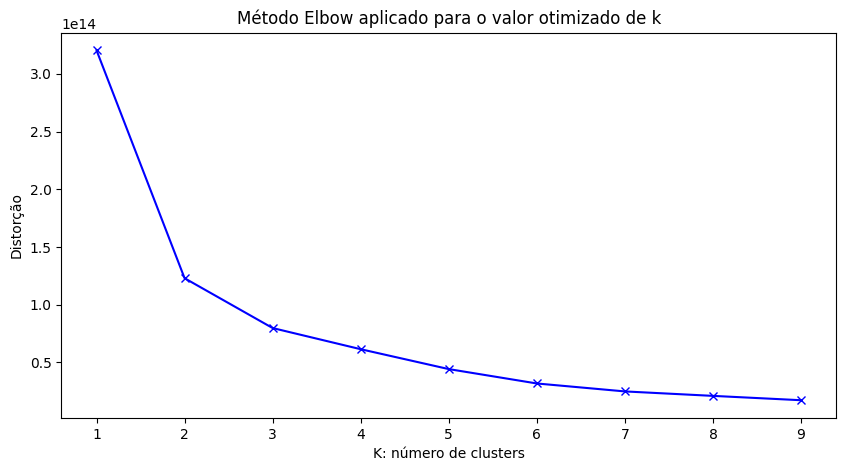

In [46]:
# Plotando o gráfico Elbow
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Definindo os labels do eixo do gráfico
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Definindo um título para o gráfico
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostrando o gráfico
plt.show()


In [47]:
# Número de clusters = 3 (com base na curva de Elbow)
num_clusters = 3
kmeanModel = KMeans(n_clusters=num_clusters)
kmeanModel.fit(X)


KMeans(n_clusters=3)

In [48]:


# A partir do modelo treinado, fazemos as predições dos clusters e criamos uma coluna chamada "k_means"
X['k_means'] = kmeanModel.predict(X)



In [49]:
# Verificando o Silhouette Score do modelo:
labels = kmeanModel.labels_
silhouette = silhouette_score(X, labels, metric='euclidean')
print(f'A Silhouette Score para o modelo é: {silhouette:.2f}.')



A Silhouette Score para o modelo é: 0.96.


In [50]:
# Adicionando a coluna "target" com os dados originais do dataset, para comparar
# Adicionamos apenas os rótulos dos clusters ao DataFrame, pois não temos um 'target' no seu conjunto de dados

X['target'] = kmeanModel.labels_


Text(0.5, 1.0, 'Clusters criados pelo algoritmo K-Means')

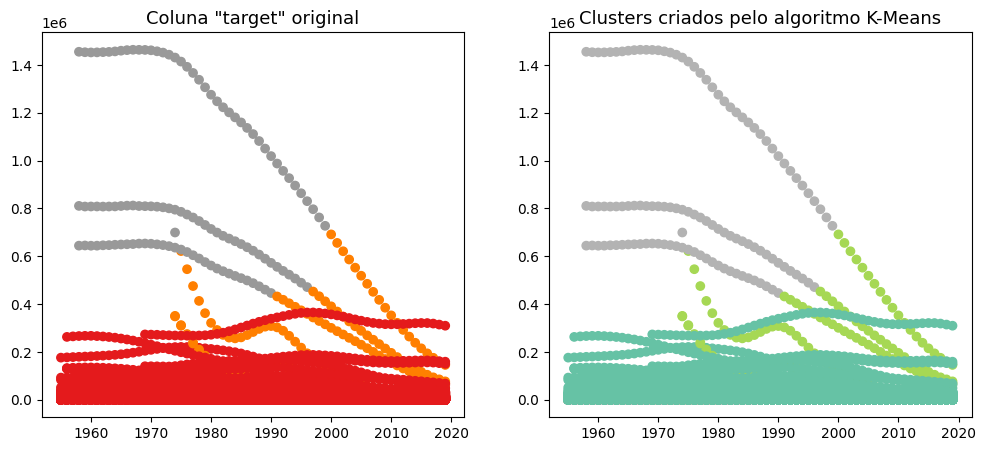

In [51]:
# Visualizando os resultados
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Visualização dos clusters originais
axes[0].scatter(X['Year'], X['Child Mortality(1 to 4)'], c=X['target'], cmap=plt.cm.Set1)
axes[1].scatter(X['Year'], X['Child Mortality(1 to 4)'], c=X['k_means'], cmap=plt.cm.Set2)
axes[0].set_title('Coluna "target" original', fontsize=13)
axes[1].set_title('Clusters criados pelo algoritmo K-Means', fontsize=13)


# Conclusão
### A partir da realização dessa Global Solution, foi possível concluir que a clusterização representa uma opção altamente eficaz na mineração de dados. Assim como a classificação, a clusterização desempenha um papel crucial na análise de padrões, mas com uma abordagem distinta.

# CRIANDO MODELO PICKLE

In [52]:
# Criar o modelo KNN treinado (KNN_model) em um arquivo chamado 'modelo_mortality.pkl'.
joblib.dump(KNN_model, 'modelo_mortality.pkl')

['modelo_mortality.pkl']